In [ ]:
!pip install keras-tuner -q

In [ ]:
!pip install scikeras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import keras_tuner
import tensorflow as tf
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split, RepeatedKFold, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix, mean_squared_error, precision_recall_curve
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, log_loss
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
import xgboost as xgb

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')
df.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [ ]:
targets = df['label']
features = df.drop(columns = ['filename', 'label'])

scaler = MinMaxScaler()
scaler.fit(features)

MinMaxScaler()

In [ ]:
targets_ohe = pd.get_dummies(targets)

In [ ]:
targets_ohe

,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
0,True,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,True
996,False,False,False,False,False,False,False,False,False,True
997,False,False,False,False,False,False,False,False,False,True
998,False,False,False,False,False,False,False,False,False,True


Logistic Regression

Original training set distribution: Counter({False: 630, True: 70})
Resampled training set distribution: Counter({False: 630, True: 630})


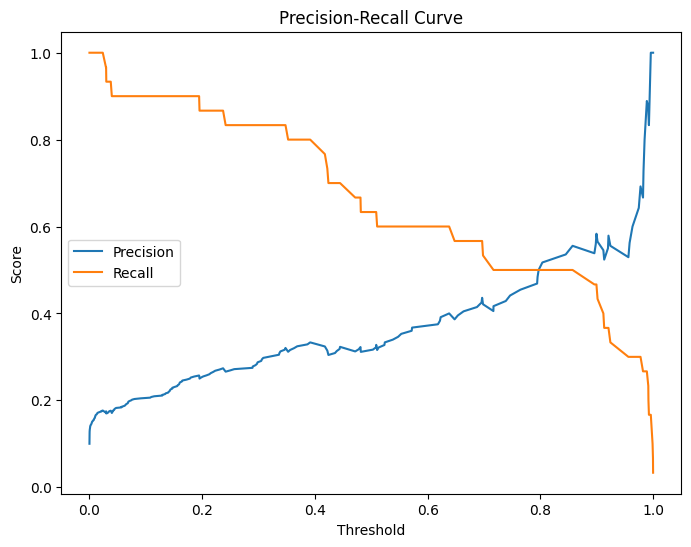


Classification Report with Custom Threshold:
              precision    recall  f1-score   support

       False       0.98      0.77      0.86       270
        True       0.29      0.83      0.43        30

    accuracy                           0.78       300
   macro avg       0.63      0.80      0.65       300
weighted avg       0.91      0.78      0.82       300

The accuracy for predicting the music type blues is: 0.8266666666666667
Training Accuracy: 0.8722222222222222

Test Accuracy: 0.8266666666666667

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.85      0.90       270
        True       0.32      0.63      0.42        30

    accuracy                           0.83       300
   macro avg       0.64      0.74      0.66       300
weighted avg       0.89      0.83      0.85       300


Test Confusion Matrix:
[[229  41]
 [ 11  19]]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1276, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/usr/l

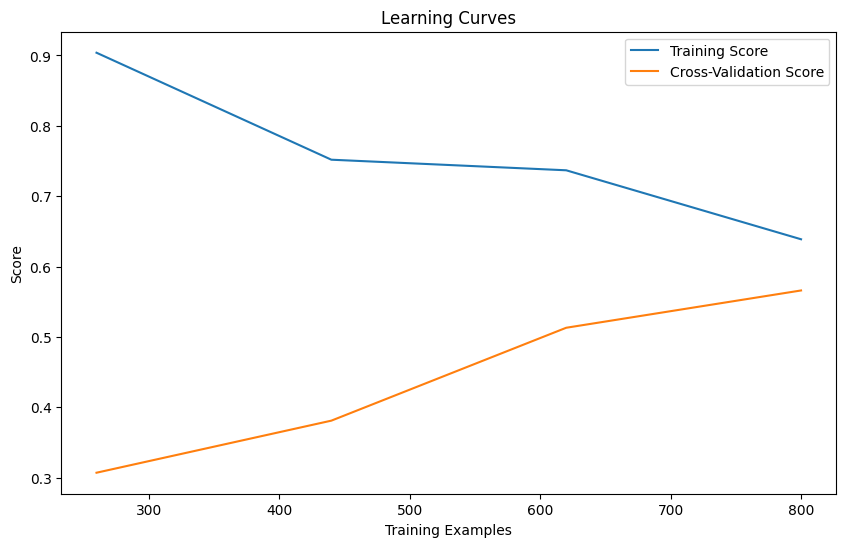

Original training set distribution: Counter({False: 630, True: 70})
Resampled training set distribution: Counter({False: 630, True: 630})


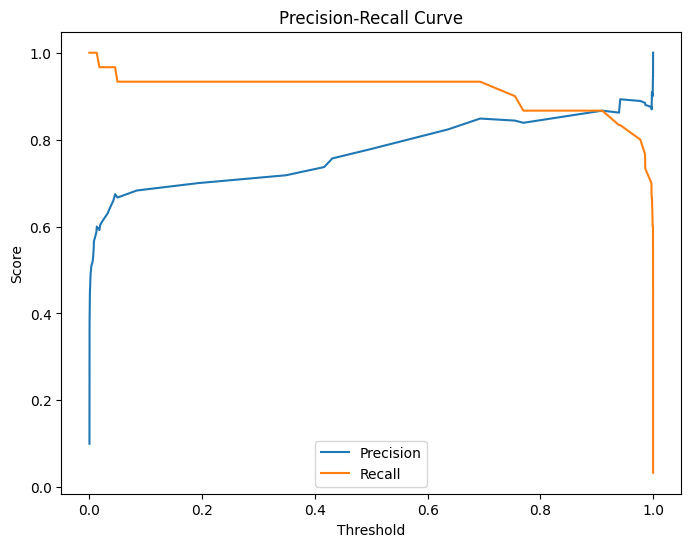


Classification Report with Custom Threshold:
              precision    recall  f1-score   support

       False       0.99      0.96      0.98       270
        True       0.72      0.93      0.81        30

    accuracy                           0.96       300
   macro avg       0.86      0.95      0.89       300
weighted avg       0.96      0.96      0.96       300

The accuracy for predicting the music type classical is: 0.9733333333333334
Training Accuracy: 0.984920634920635

Test Accuracy: 0.9733333333333334

Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.98      0.99       270
        True       0.82      0.93      0.88        30

    accuracy                           0.97       300
   macro avg       0.91      0.96      0.93       300
weighted avg       0.98      0.97      0.97       300


Test Confusion Matrix:
[[264   6]
 [  2  28]]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1276, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/usr/l

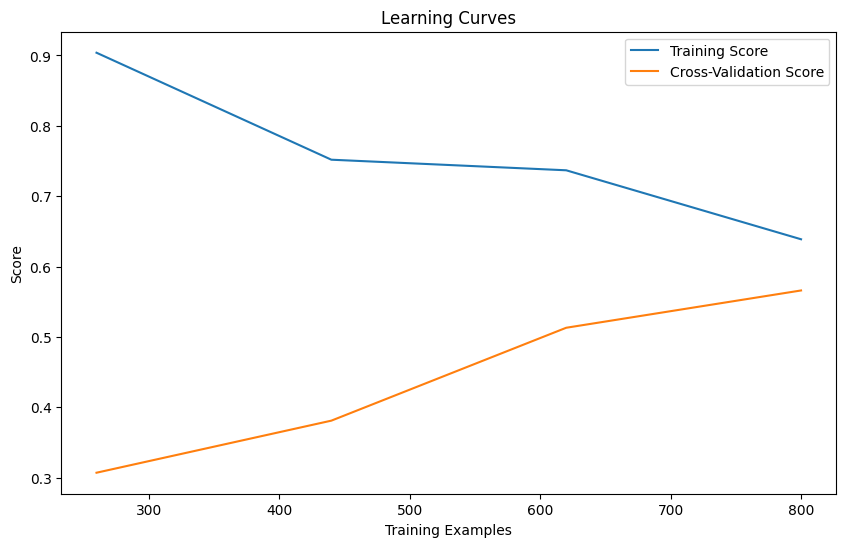

Original training set distribution: Counter({False: 630, True: 70})
Resampled training set distribution: Counter({False: 630, True: 630})


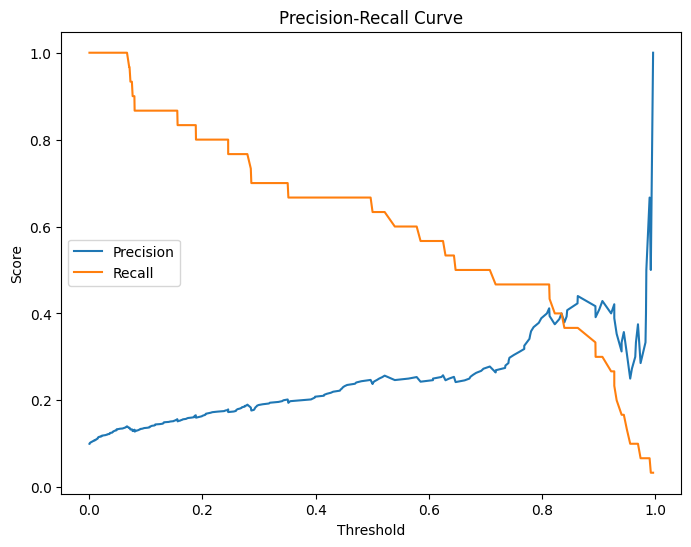


Classification Report with Custom Threshold:
              precision    recall  f1-score   support

       False       0.95      0.67      0.79       270
        True       0.19      0.70      0.30        30

    accuracy                           0.67       300
   macro avg       0.57      0.69      0.54       300
weighted avg       0.88      0.67      0.74       300

The accuracy for predicting the music type country is: 0.76
Training Accuracy: 0.8103174603174603

Test Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.77      0.85       270
        True       0.24      0.63      0.35        30

    accuracy                           0.76       300
   macro avg       0.59      0.70      0.60       300
weighted avg       0.88      0.76      0.80       300


Test Confusion Matrix:
[[209  61]
 [ 11  19]]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1276, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/usr/l

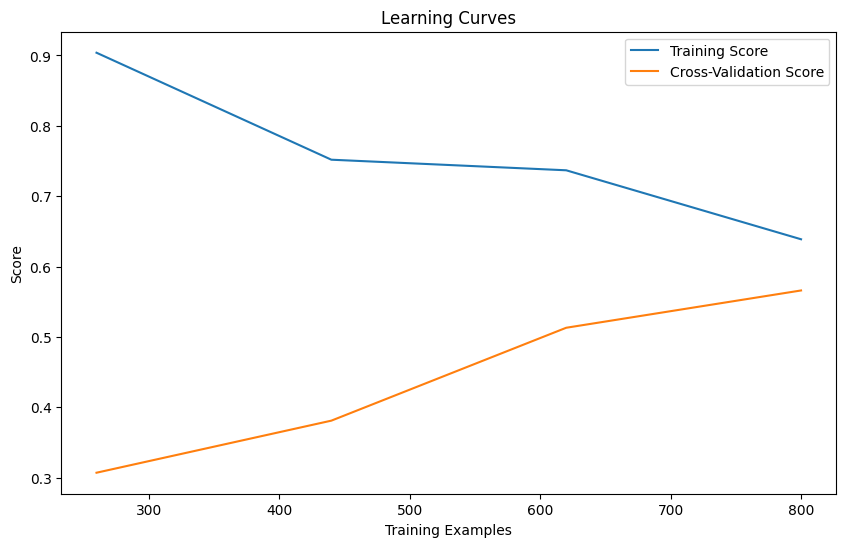

Original training set distribution: Counter({False: 630, True: 70})
Resampled training set distribution: Counter({False: 630, True: 630})


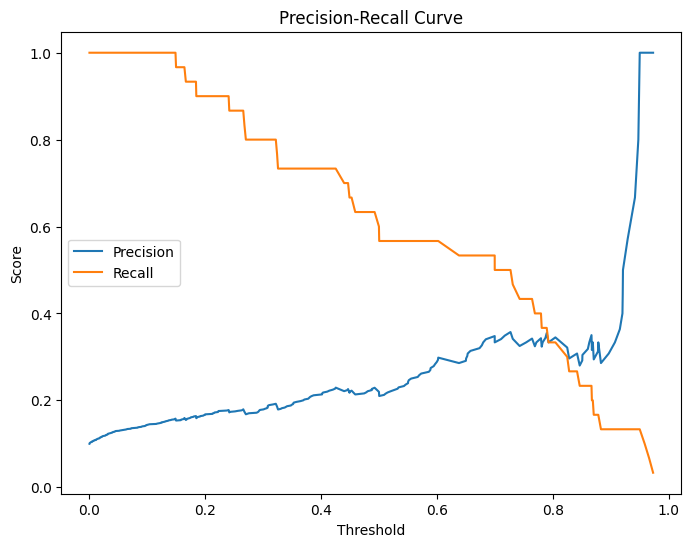


Classification Report with Custom Threshold:
              precision    recall  f1-score   support

       False       0.96      0.59      0.73       270
        True       0.18      0.80      0.29        30

    accuracy                           0.61       300
   macro avg       0.57      0.70      0.51       300
weighted avg       0.89      0.61      0.69       300

The accuracy for predicting the music type disco is: 0.7433333333333333
Training Accuracy: 0.8087301587301587

Test Accuracy: 0.7433333333333333

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.76      0.84       270
        True       0.21      0.57      0.31        30

    accuracy                           0.74       300
   macro avg       0.58      0.66      0.57       300
weighted avg       0.87      0.74      0.79       300


Test Confusion Matrix:
[[206  64]
 [ 13  17]]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1276, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/usr/l

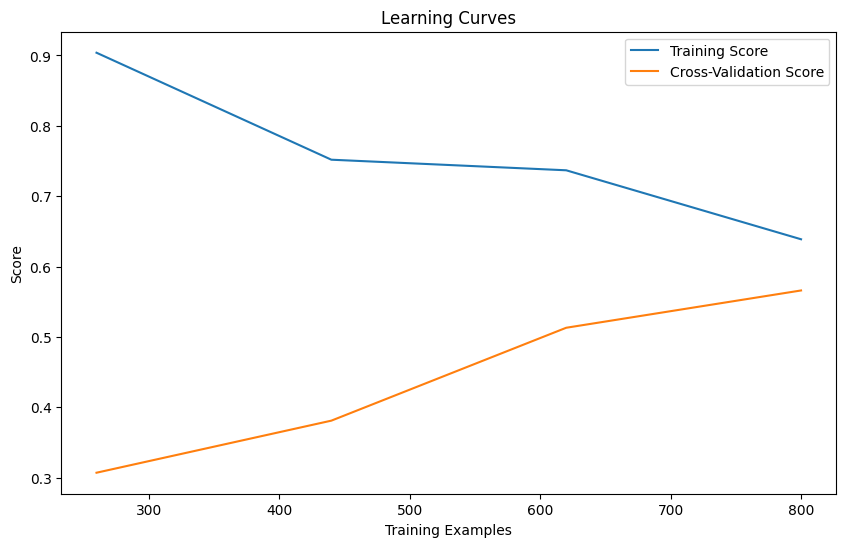

Original training set distribution: Counter({False: 630, True: 70})
Resampled training set distribution: Counter({False: 630, True: 630})


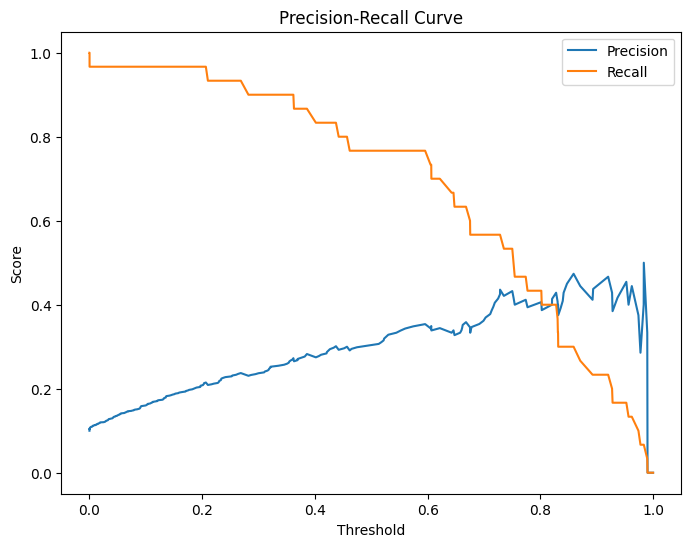


Classification Report with Custom Threshold:
              precision    recall  f1-score   support

       False       0.98      0.68      0.81       270
        True       0.24      0.90      0.38        30

    accuracy                           0.70       300
   macro avg       0.61      0.79      0.59       300
weighted avg       0.91      0.70      0.76       300

The accuracy for predicting the music type hiphop is: 0.8033333333333333
Training Accuracy: 0.8365079365079365

Test Accuracy: 0.8033333333333333

Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.81      0.88       270
        True       0.31      0.77      0.44        30

    accuracy                           0.80       300
   macro avg       0.64      0.79      0.66       300
weighted avg       0.90      0.80      0.84       300


Test Confusion Matrix:
[[218  52]
 [  7  23]]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1276, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/usr/l

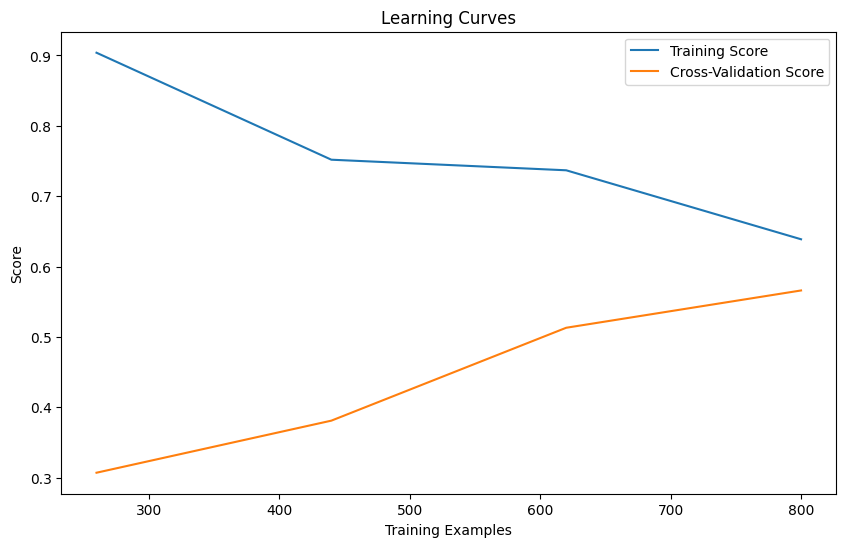

Original training set distribution: Counter({False: 630, True: 70})
Resampled training set distribution: Counter({False: 630, True: 630})


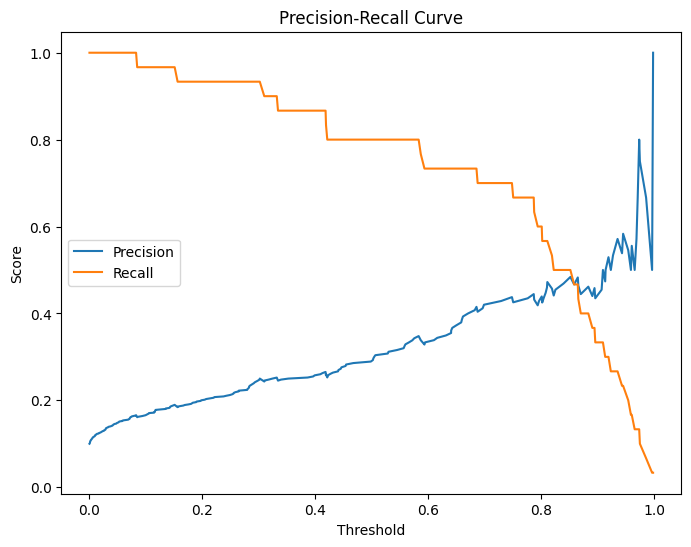


Classification Report with Custom Threshold:
              precision    recall  f1-score   support

       False       0.99      0.69      0.81       270
        True       0.25      0.93      0.39        30

    accuracy                           0.71       300
   macro avg       0.62      0.81      0.60       300
weighted avg       0.92      0.71      0.77       300

The accuracy for predicting the music type jazz is: 0.7866666666666666
Training Accuracy: 0.8587301587301587

Test Accuracy: 0.7866666666666666

Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.79      0.87       270
        True       0.29      0.80      0.43        30

    accuracy                           0.79       300
   macro avg       0.63      0.79      0.65       300
weighted avg       0.90      0.79      0.82       300


Test Confusion Matrix:
[[212  58]
 [  6  24]]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1276, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/usr/l

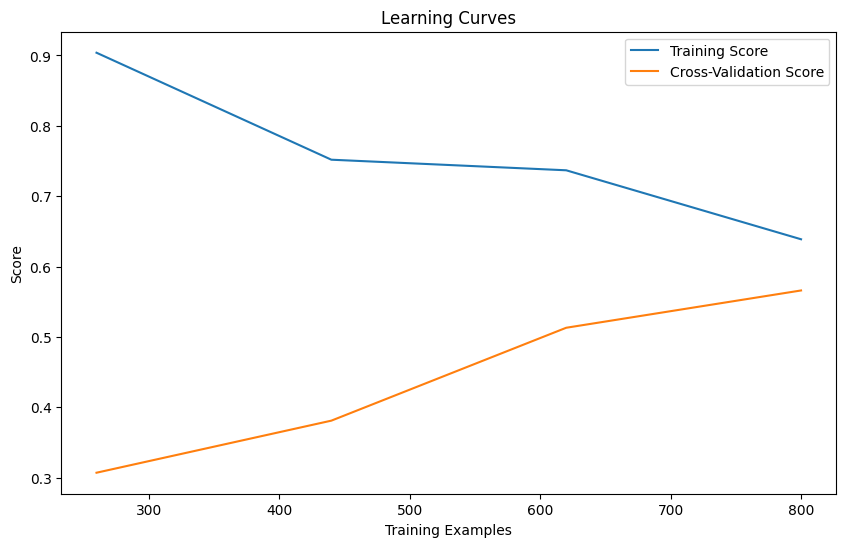

Original training set distribution: Counter({False: 630, True: 70})
Resampled training set distribution: Counter({False: 630, True: 630})


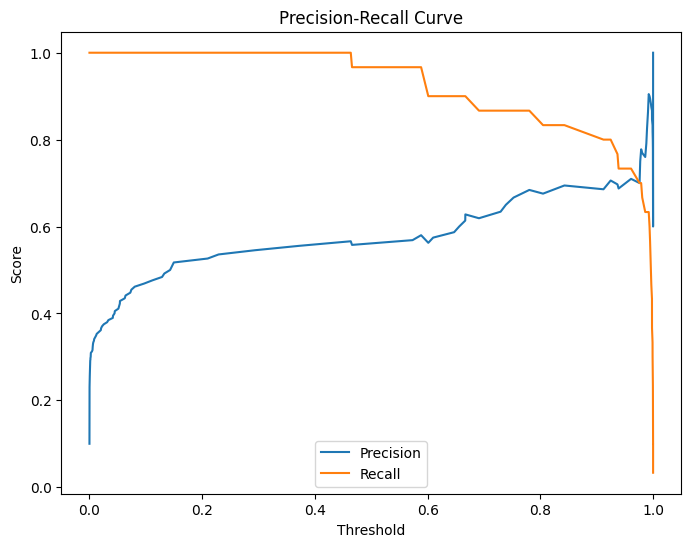


Classification Report with Custom Threshold:
              precision    recall  f1-score   support

       False       1.00      0.91      0.95       270
        True       0.56      1.00      0.71        30

    accuracy                           0.92       300
   macro avg       0.78      0.96      0.83       300
weighted avg       0.96      0.92      0.93       300

The accuracy for predicting the music type metal is: 0.9233333333333333
Training Accuracy: 0.9595238095238096

Test Accuracy: 0.9233333333333333

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.92      0.96       270
        True       0.57      0.97      0.72        30

    accuracy                           0.92       300
   macro avg       0.78      0.94      0.84       300
weighted avg       0.95      0.92      0.93       300


Test Confusion Matrix:
[[248  22]
 [  1  29]]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1276, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/usr/l

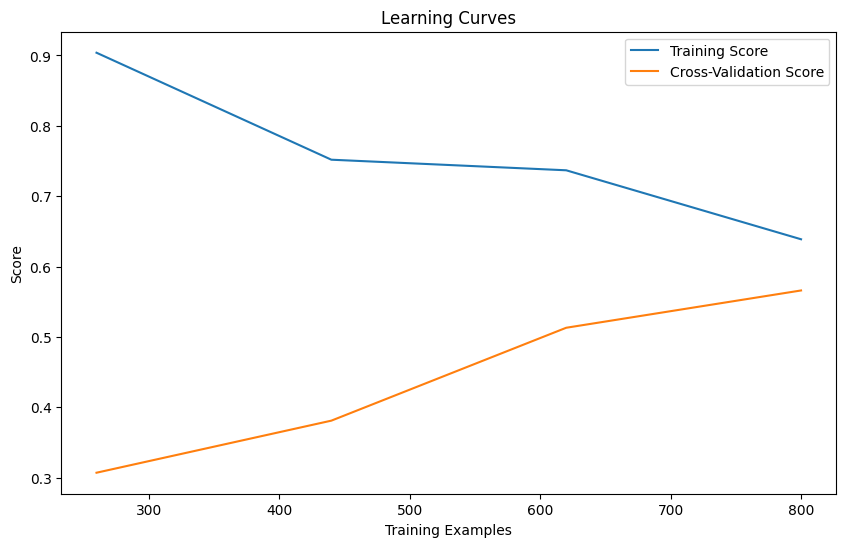

Original training set distribution: Counter({False: 630, True: 70})
Resampled training set distribution: Counter({False: 630, True: 630})


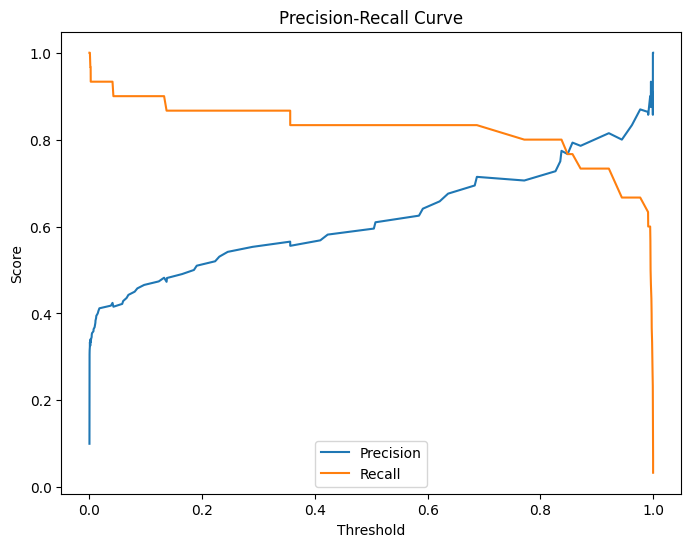


Classification Report with Custom Threshold:
              precision    recall  f1-score   support

       False       0.98      0.93      0.95       270
        True       0.57      0.87      0.68        30

    accuracy                           0.92       300
   macro avg       0.77      0.90      0.82       300
weighted avg       0.94      0.92      0.93       300

The accuracy for predicting the music type pop is: 0.9266666666666666
Training Accuracy: 0.9619047619047619

Test Accuracy: 0.9266666666666666

Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.94      0.96       270
        True       0.60      0.83      0.69        30

    accuracy                           0.93       300
   macro avg       0.79      0.89      0.83       300
weighted avg       0.94      0.93      0.93       300


Test Confusion Matrix:
[[253  17]
 [  5  25]]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1276, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/usr/l

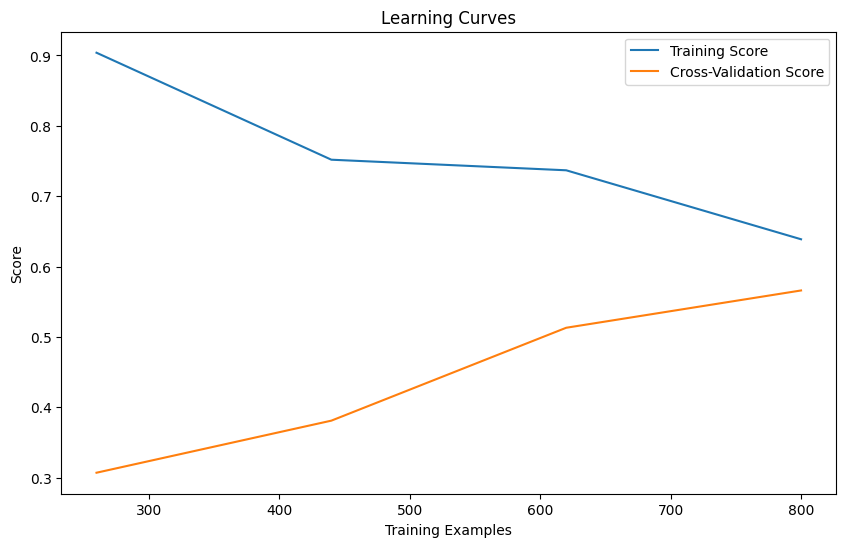

Original training set distribution: Counter({False: 630, True: 70})
Resampled training set distribution: Counter({False: 630, True: 630})


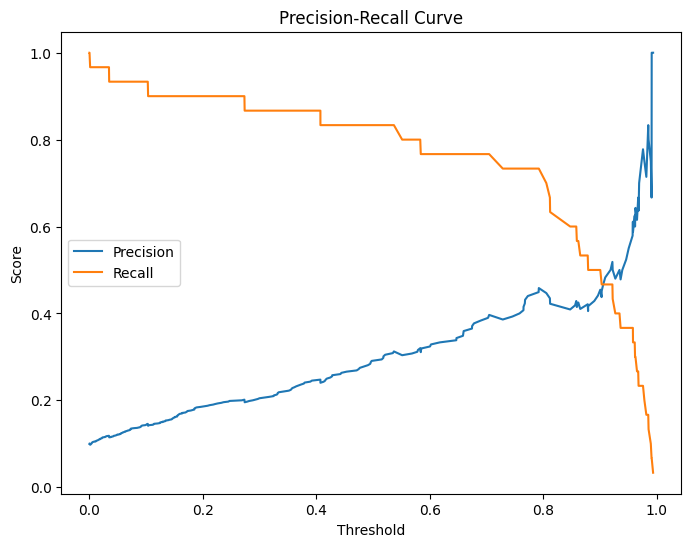


Classification Report with Custom Threshold:
              precision    recall  f1-score   support

       False       0.98      0.63      0.76       270
        True       0.20      0.87      0.33        30

    accuracy                           0.65       300
   macro avg       0.59      0.75      0.55       300
weighted avg       0.90      0.65      0.72       300

The accuracy for predicting the music type reggae is: 0.7833333333333333
Training Accuracy: 0.8269841269841269

Test Accuracy: 0.7833333333333333

Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.78      0.87       270
        True       0.29      0.83      0.43        30

    accuracy                           0.78       300
   macro avg       0.64      0.81      0.65       300
weighted avg       0.91      0.78      0.82       300


Test Confusion Matrix:
[[210  60]
 [  5  25]]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1276, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/usr/l

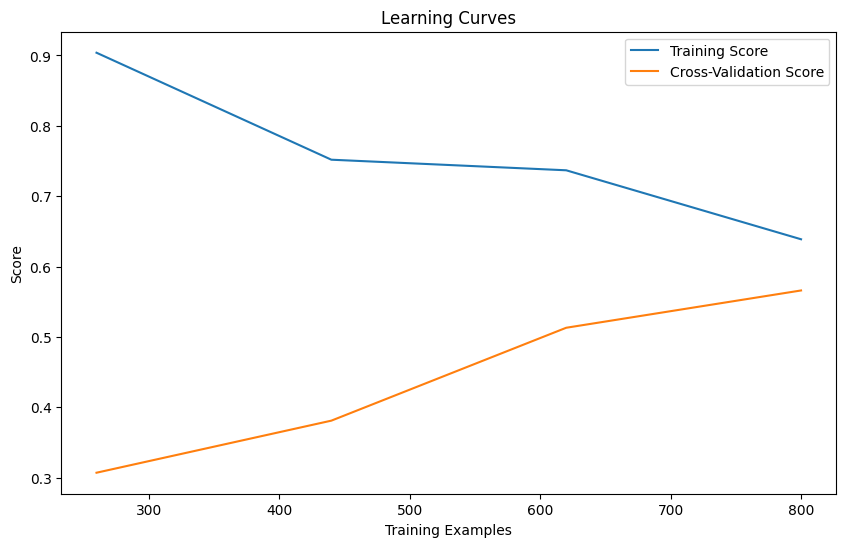

Original training set distribution: Counter({False: 630, True: 70})
Resampled training set distribution: Counter({False: 630, True: 630})


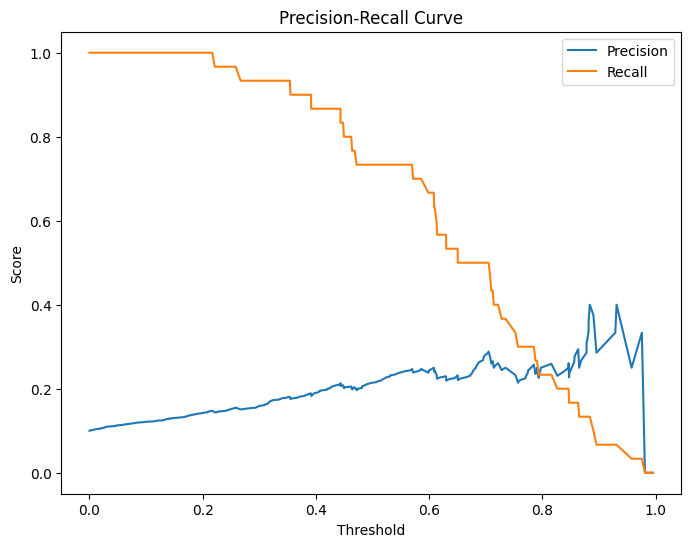


Classification Report with Custom Threshold:
              precision    recall  f1-score   support

       False       0.98      0.46      0.62       270
        True       0.16      0.93      0.27        30

    accuracy                           0.50       300
   macro avg       0.57      0.69      0.45       300
weighted avg       0.90      0.50      0.59       300

The accuracy for predicting the music type rock is: 0.7066666666666667
Training Accuracy: 0.7873015873015873

Test Accuracy: 0.7066666666666667

Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.70      0.81       270
        True       0.22      0.73      0.33        30

    accuracy                           0.71       300
   macro avg       0.59      0.72      0.57       300
weighted avg       0.89      0.71      0.76       300


Test Confusion Matrix:
[[190  80]
 [  8  22]]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1276, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/usr/l

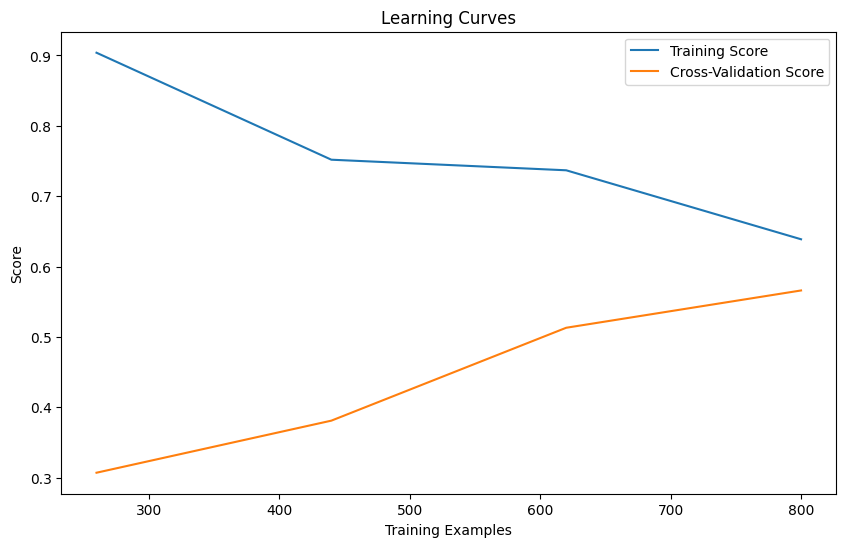

In [ ]:
for i in targets_ohe.columns:
  X_train, X_test, y_train, y_test = train_test_split(features, targets_ohe[i], test_size=0.3, stratify=targets_ohe[i], random_state=0)
  smote = SMOTE(random_state=0)
  X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
  print(f'Original training set distribution: {Counter(y_train)}')
  print(f'Resampled training set distribution: {Counter(y_train_resampled)}')
  logreg = LogisticRegression(max_iter = 1000, solver = 'liblinear', class_weight='balanced')
  logregmodel = logreg.fit(X_train_resampled, y_train_resampled)
  yhat_train = logreg.predict(X_train_resampled)
  yhat_test = logreg.predict(X_test)
  y_probs = logregmodel.predict_proba(X_test)[:, 1]
  precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
  plt.figure(figsize=(8, 6))
  plt.plot(thresholds, precision[:-1], label="Precision")
  plt.plot(thresholds, recall[:-1], label="Recall")
  plt.xlabel("Threshold")
  plt.ylabel("Score")
  plt.title("Precision-Recall Curve")
  plt.legend()
  plt.show()
  custom_threshold = 0.3
  yhat_test_custom = (y_probs >= custom_threshold).astype(int)
  print("\nClassification Report with Custom Threshold:")
  print(classification_report(y_test, yhat_test_custom))
  print('The accuracy for predicting the music type '+ i + ' is: ' + str(logreg.score(X_test, y_test)))

  train_accuracy = accuracy_score(y_train_resampled, yhat_train)
  print("Training Accuracy:", train_accuracy)

  test_accuracy = accuracy_score(y_test, yhat_test)
  print("\nTest Accuracy:", test_accuracy)

  print("\nClassification Report:")
  print(classification_report(y_test, yhat_test))

  conf_matrix = confusion_matrix(y_test, yhat_test)
  print("\nTest Confusion Matrix:")
  print(conf_matrix)

  from sklearn.model_selection import learning_curve

  X = features
  y = targets

  # Assuming you have X, y, and a model
  train_sizes, train_scores, test_scores = learning_curve(logreg, X, y, cv=5, scoring='accuracy', n_jobs=-1)

  # Calculate mean training and testing scores
  train_scores_mean = np.mean(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)

  # Plot learning curves
  plt.figure(figsize=(10, 6))
  plt.plot(train_sizes, train_scores_mean, label='Training Score')
  plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
  plt.xlabel('Training Examples')
  plt.ylabel('Score')
  plt.title('Learning Curves')
  plt.legend()
  plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
logregmodel = logreg.fit(X_train, y_train)
yhat_train = logreg.predict(X_train)
yhat_test = logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
logreg.score(X_test, y_test)

0.5666666666666667

In [ ]:
logreg.score(X_train, y_train)

0.6228571428571429

In [ ]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

       blues       0.38      0.56      0.45        27
   classical       0.84      0.76      0.80        21
     country       0.56      0.55      0.55        33
       disco       0.52      0.59      0.55        29
      hiphop       0.53      0.26      0.35        34
        jazz       0.55      0.57      0.56        28
       metal       0.82      0.87      0.84        31
         pop       0.61      0.88      0.72        34
      reggae       0.42      0.50      0.46        26
        rock       0.50      0.24      0.33        37

    accuracy                           0.57       300
   macro avg       0.57      0.58      0.56       300
weighted avg       0.57      0.57      0.55       300



Training Accuracy: 0.6228571428571429

Test Accuracy: 0.5666666666666667

Classification Report:
              precision    recall  f1-score   support

       blues       0.38      0.56      0.45        27
   classical       0.84      0.76      0.80        21
     country       0.56      0.55      0.55        33
       disco       0.52      0.59      0.55        29
      hiphop       0.53      0.26      0.35        34
        jazz       0.55      0.57      0.56        28
       metal       0.82      0.87      0.84        31
         pop       0.61      0.88      0.72        34
      reggae       0.42      0.50      0.46        26
        rock       0.50      0.24      0.33        37

    accuracy                           0.57       300
   macro avg       0.57      0.58      0.56       300
weighted avg       0.57      0.57      0.55       300


Test Confusion Matrix:
[[15  0  1  2  1  1  1  0  2  4]
 [ 1 16  1  0  0  2  0  0  0  1]
 [ 7  0 18  3  1  1  1  1  1  0]
 [ 1  1  1 17  0  1  

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 clas

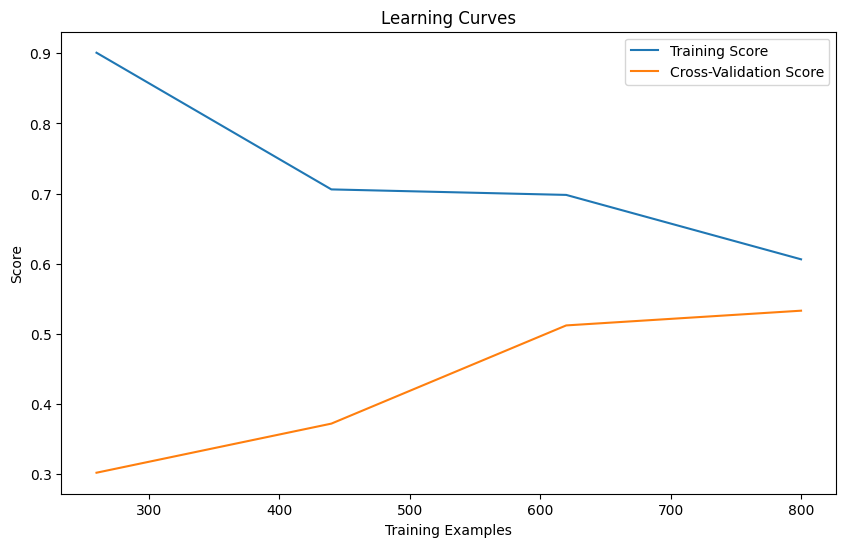

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error

train_accuracy = accuracy_score(y_train, yhat_train)
print("Training Accuracy:", train_accuracy)

test_accuracy = accuracy_score(y_test, yhat_test)
print("\nTest Accuracy:", test_accuracy)

print("\nClassification Report:")
print(classification_report(y_test, yhat_test))

conf_matrix = confusion_matrix(y_test, yhat_test)
print("\nTest Confusion Matrix:")
print(conf_matrix)

from sklearn.model_selection import learning_curve

X = features
y = targets

# Assuming you have X, y, and a model
train_sizes, train_scores, test_scores = learning_curve(logreg, X, y, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate mean training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()

Neural Network

In [ ]:
def buildmodel():
    model = Sequential([
        Dense(units = 128, activation = 'relu', input_dim = 28),
        Dense(units = 64, activation = 'relu'),
        Dense(units = 32, activation = 'relu'),
        Dense(units = 32, activation = 'relu'),
        Dense(units = 10, activation = 'softmax')
    ])
    model.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return(model)

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_train_onehot = to_categorical(y_train_encoded, num_classes=10)
y_test_onehot = to_categorical(y_test_encoded, num_classes=10)

In [ ]:
classifier = buildmodel()
history = classifier.fit(X_train.astype(float), y_train_onehot, batch_size = 20, validation_split=0.1, epochs = 100, verbose = 0)
yhat_test = classifier.predict(X_test.astype(float))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [ ]:
actual = np.argmax(y_test_onehot, axis=1)
pred = np.argmax(yhat_test, axis=1)
print(classification_report(actual,pred))

              precision    recall  f1-score   support

           0       0.69      0.33      0.45        27
           1       0.43      0.86      0.57        21
           2       0.60      0.09      0.16        33
           3       0.12      0.03      0.05        29
           4       0.37      0.21      0.26        34
           5       0.70      0.25      0.37        28
           6       0.92      0.77      0.84        31
           7       1.00      0.06      0.11        34
           8       0.18      0.69      0.29        26
           9       0.25      0.51      0.34        37

    accuracy                           0.36       300
   macro avg       0.53      0.38      0.34       300
weighted avg       0.53      0.36      0.33       300



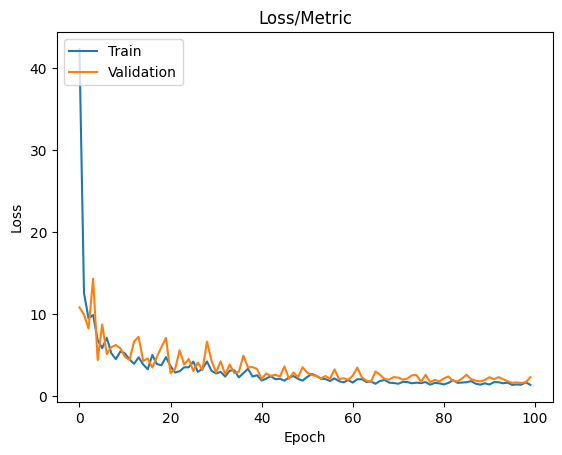

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss/Metric')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
def buildmodel():
    model = Sequential([
        Dense(units = 128, activation = 'relu', input_dim = 28),
        Dense(units = 64, activation = 'relu'),
        Dense(units = 32, activation = 'relu'),
        Dense(units = 32, activation = 'relu'),
        Dense(units = 10, activation = 'softmax')
    ])
    model.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=['mse', 'accuracy'])
    return(model)

#epochs are the number of iterative training steps we do on the entire dataset, and each iteration is a step. batch_size is the number of datapoints we select per batch. total obs = batch_size * batches
estimator = KerasClassifier(model=buildmodel, epochs=50, batch_size=20, verbose=0) # before submitting please set verbose = 0, and rerun. If not grading will be no bueno!
kfold = RepeatedKFold(n_splits = 10, n_repeats = 5)
results = cross_val_score(estimator, X_train, y_train_onehot, cv=kfold, n_jobs = 1,scoring = 'accuracy')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

In [ ]:
avg_acc = results.mean()
avg_acc

0.3417142857142857

Hyperparameter Tuning

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [ ]:
#build the hyperparameter tuning model with tuning the units, activation function, and learning rates
def build_model(hp):
    model = keras.Sequential()
    activation = hp.Choice("activation", ['relu', 'sigmoid', 'tanh', 'softmax', 'linear', 'leaky_relu', 'mish'])
    # input layer
    model.add(
        layers.Dense(units = hp.Int("units", min_value = 18, max_value = 180, step = 20),
              activation = activation,
              input_dim = X.shape[1]
        )
    )
    # hidden layers
    for i in range(3):
      model.add(
          layers.Dense(
              units = hp.Int("units", min_value = 12, max_value = 180, step = 20),
              activation = activation,
          )
      )
    # output layer
    model.add(
          layers.Dense(
              units = 10,
              activation = 'softmax'
          )
      )
    loss = hp.Choice("loss", values = ["categorical_crossentropy", "mse", "binary_crossentropy"])
    learning_rate = hp.Float("lr", min_value = 0.001, max_value = 0.1, step = 0.01)
    optimizer = hp.Choice("optimizer", values = ["sgd", "adam", "rmsprop"])
    if optimizer == "sgd":
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == "adam":
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == "rmsprop":
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)

    model.compile(
        optimizer = optimizer,
        loss = loss,
        metrics = ["accuracy"],
    )
    return model

In [ ]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=10,
    overwrite=True,
    directory="my_dir",
    project_name="hypertune",
)
tuner.search(X_train, y_train_onehot, epochs=50, validation_data=(X_test, y_test_onehot), callbacks = [early_stopping], verbose = 0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

In [ ]:
tuner.results_summary(num_trials=1)

Results summary
Results in my_dir/hypertune
Showing 1 best trials
Objective(name="val_accuracy", direction="max")

Trial 01 summary
Hyperparameters:
activation: relu
units: 138
loss: binary_crossentropy
lr: 0.021
optimizer: sgd
Score: 0.39666667580604553


In [ ]:
print(f"X_train shape: {X_train.shape}")
y_train_onehot = to_categorical(label_encoder.fit_transform(y_train), num_classes=10)
print(f"y_train_onehot shape: {y_train_onehot.shape}")

X_train shape: (800, 28)
y_train_onehot shape: (800, 10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
              precision    recall  f1-score   support

           0       0.38      0.62      0.48        16
           1       0.68      0.68      0.68        25
           2       0.64      0.50      0.56        18
           3       0.43      0.38      0.41        26
           4       0.39      0.39      0.39        18
           5       0.44      0.44      0.44        16
           6       0.70      0.74      0.72        19
           7       0.67      0.84      0.74        19
           8       0.64      0.62      0.63        26
           9       0.00      0.00      0.00        17

    accuracy                           0.53       200
   macro avg       0.50      0.52      0.50       200
weighted avg       0.51      0.53      0.52       200



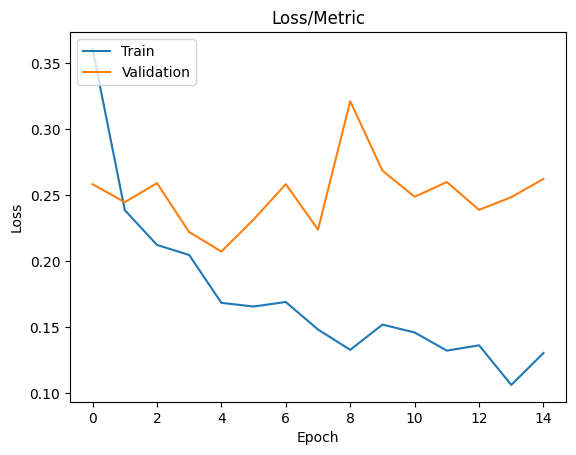

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

history = model.fit(X_train.astype(float), y_train_onehot, epochs=100, verbose = 0, callbacks = [early_stopping], validation_split = 0.2)

yhat_test = model.predict(X_test.astype(float))
actual = y_test
pred = np.argmax(yhat_test, axis=1)

print(classification_report(actual,pred))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss/Metric')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

XgBoost

In [ ]:
scaler = StandardScaler()
StandardScaler()
X_scaled = scaler.fit_transform(features)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(targets)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=21)

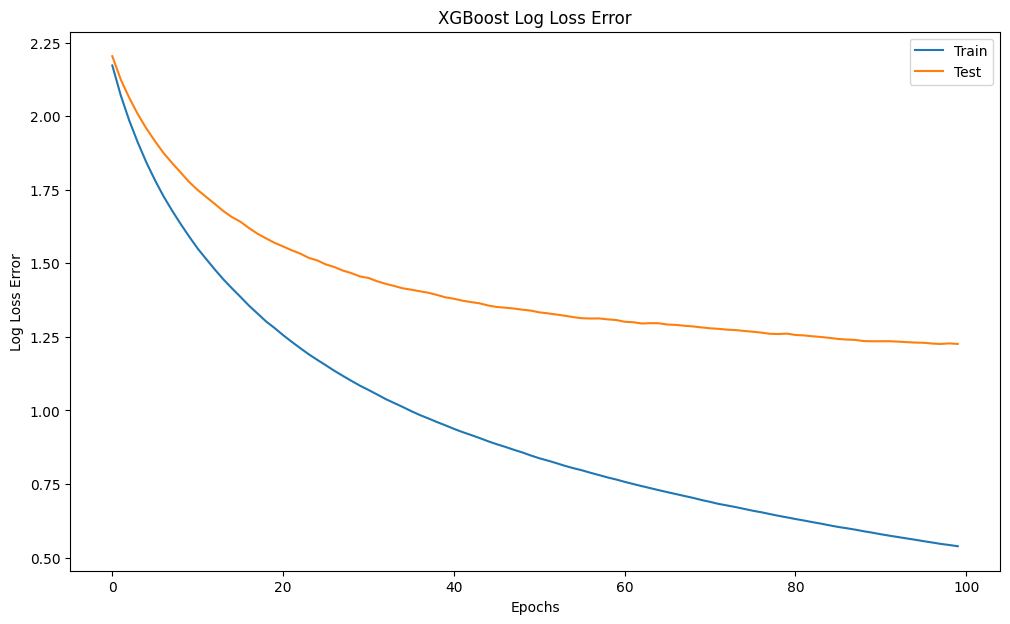

In [ ]:
eval_set = [(X_train, y_train), (X_test, y_test)]
model = xgb.XGBClassifier(objective='multi:softmax', max_depth=2, learning_rate=0.1, n_estimators=100, eval_metric='mlogloss')
model.fit(X_train, y_train, eval_set=eval_set, verbose=0)

results = model.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

train_error = results['validation_0']['mlogloss']
test_error = results['validation_1']['mlogloss']

plt.figure(figsize=(12, 7))
plt.plot(x_axis, train_error, label='Train')
plt.plot(x_axis, test_error, label='Test')

plt.legend()
plt.ylabel('Log Loss Error')
plt.xlabel('Epochs')
plt.title('XGBoost Log Loss Error')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.56      0.53        16
           1       0.85      0.68      0.76        25
           2       0.62      0.44      0.52        18
           3       0.48      0.50      0.49        26
           4       0.69      0.61      0.65        18
           5       0.48      0.62      0.54        16
           6       0.80      0.84      0.82        19
           7       0.65      0.68      0.67        19
           8       0.67      0.62      0.64        26
           9       0.24      0.29      0.26        17

    accuracy                           0.59       200
   macro avg       0.60      0.59      0.59       200
weighted avg       0.61      0.59      0.60       200



In [ ]:
model = xgb.XGBClassifier()

param_dist = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300, 400, 500],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]
}

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=25, scoring='accuracy', cv=3, verbose=1, random_state=0)

random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)
print("Best accuracy found: ", random_search.best_score_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best parameters found:  {'subsample': 0.7, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.05}
Best accuracy found:  0.6337472895722452
